### Avoid Overfitting By Early Stopping With XGBoost In Python
https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/

Overfitting is a problem with sophisticated non-linear learning algorithms like gradient boosting.
Stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

It works by monitoring the performance of the model that is being trained on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

It avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit.

The performance measure may be the loss function that is being optimized to train the model (such as logarithmic loss), or an external metric of interest to the problem in general (such as classification accuracy).

> XGBoost supports a suite of evaluation metrics not limited to:

“rmse” for root mean squared error.
“mae” for mean absolute error.
“logloss” for binary logarithmic loss and “mlogloss” for multi-class log loss (cross entropy).
“error” for classification error.
“auc” for area under ROC curve.

In [3]:
# monitor training performance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('datasets/pima-indians-diabetes.data_06apr2021.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.28347
[1]	validation_0-error:0.25984
[2]	validation_0-error:0.25591
[3]	validation_0-error:0.24803
[4]	validation_0-error:0.24409
[5]	validation_0-error:0.24803
[6]	validation_0-error:0.25591
[7]	validation_0-error:0.24803
[8]	validation_0-error:0.25591
[9]	validation_0-error:0.24409
[10]	validation_0-error:0.24803
[11]	validation_0-error:0.24409
[12]	validation_0-error:0.23228
[13]	validation_0-error:0.24016
[14]	validation_0-error:0.23622
[15]	validation_0-error:0.24409
[16]	validation_0-error:0.25591
[17]	validation_0-error:0.23622
[18]	validation_0-error:0.24016
[19]	validation_0-error:0.23622
[20]	validation_0-error:0.23622
[21]	validation_0-error:0.23622
[22]	validation_0-error:0.23622
[23]	validation_0-error:0.24409


C:\Users\sjain191\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-error:0.24409
[25]	validation_0-error:0.24016
[26]	validation_0-error:0.24409
[27]	validation_0-error:0.24409
[28]	validation_0-error:0.25591
[29]	validation_0-error:0.25197
[30]	validation_0-error:0.24803
[31]	validation_0-error:0.25591
[32]	validation_0-error:0.25591
[33]	validation_0-error:0.25984
[34]	validation_0-error:0.26378
[35]	validation_0-error:0.26378
[36]	validation_0-error:0.26378
[37]	validation_0-error:0.26772
[38]	validation_0-error:0.26378
[39]	validation_0-error:0.25984
[40]	validation_0-error:0.25591
[41]	validation_0-error:0.24409
[42]	validation_0-error:0.24803
[43]	validation_0-error:0.24803
[44]	validation_0-error:0.25591
[45]	validation_0-error:0.25197
[46]	validation_0-error:0.26378
[47]	validation_0-error:0.26378
[48]	validation_0-error:0.26378
[49]	validation_0-error:0.25984
[50]	validation_0-error:0.27165
[51]	validation_0-error:0.26772
[52]	validation_0-error:0.27165
[53]	validation_0-error:0.26772
[54]	validation_0-error:0.26378
[55]	val

The performance of the model on each evaluation set is stored and made available by the model after training by calling the model.evals_result() function.

[0]	validation_0-error:0.13619	validation_0-logloss:0.55257	validation_1-error:0.28347	validation_1-logloss:0.60491
[1]	validation_0-error:0.10895	validation_0-logloss:0.46754	validation_1-error:0.25984	validation_1-logloss:0.55934
[2]	validation_0-error:0.10506	validation_0-logloss:0.40734	validation_1-error:0.25591	validation_1-logloss:0.53068
[3]	validation_0-error:0.09144	validation_0-logloss:0.36480	validation_1-error:0.24803	validation_1-logloss:0.51795
[4]	validation_0-error:0.08560	validation_0-logloss:0.33012	validation_1-error:0.24409	validation_1-logloss:0.51153
[5]	validation_0-error:0.07782	validation_0-logloss:0.29868	validation_1-error:0.24803	validation_1-logloss:0.50935
[6]	validation_0-error:0.06809	validation_0-logloss:0.27852	validation_1-error:0.25591	validation_1-logloss:0.50818
[7]	validation_0-error:0.06615	validation_0-logloss:0.26182	validation_1-error:0.24803	validation_1-logloss:0.51097
[8]	validation_0-error:0.06226	validation_0-logloss:0.24578	validation_1

C:\Users\sjain191\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[44]	validation_0-error:0.00000	validation_0-logloss:0.06629	validation_1-error:0.25591	validation_1-logloss:0.64323
[45]	validation_0-error:0.00000	validation_0-logloss:0.06394	validation_1-error:0.25197	validation_1-logloss:0.64747
[46]	validation_0-error:0.00000	validation_0-logloss:0.06230	validation_1-error:0.26378	validation_1-logloss:0.64921
[47]	validation_0-error:0.00000	validation_0-logloss:0.06090	validation_1-error:0.26378	validation_1-logloss:0.65250
[48]	validation_0-error:0.00000	validation_0-logloss:0.05953	validation_1-error:0.26378	validation_1-logloss:0.65838
[49]	validation_0-error:0.00000	validation_0-logloss:0.05801	validation_1-error:0.25984	validation_1-logloss:0.66152
[50]	validation_0-error:0.00000	validation_0-logloss:0.05643	validation_1-error:0.27165	validation_1-logloss:0.66584
[51]	validation_0-error:0.00000	validation_0-logloss:0.05549	validation_1-error:0.26772	validation_1-logloss:0.66783
[52]	validation_0-error:0.00000	validation_0-logloss:0.05462	val

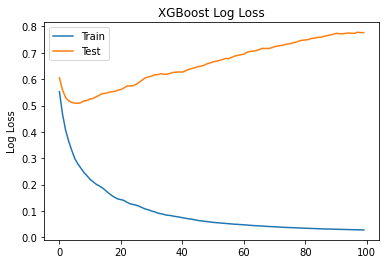

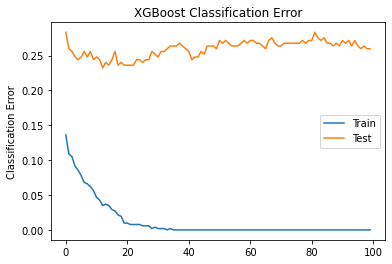

In [5]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load data
dataset = loadtxt('datasets/pima-indians-diabetes.data_06apr2021.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

>Early Stopping With XGBoost:

XGBoost supports early stopping after a fixed number of iterations.

In addition to specifying a metric and test dataset for evaluation each epoch, you must specify a window of the number of epochs over which no improvement is observed. This is specified in the early_stopping_rounds parameter.

In [6]:
# early stopping
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('datasets/pima-indians-diabetes.data_06apr2021.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.60491
[1]	validation_0-logloss:0.55934
[2]	validation_0-logloss:0.53068
[3]	validation_0-logloss:0.51795
[4]	validation_0-logloss:0.51153
[5]	validation_0-logloss:0.50935
[6]	validation_0-logloss:0.50818
[7]	validation_0-logloss:0.51097
[8]	validation_0-logloss:0.51760
[9]	validation_0-logloss:0.51912
[10]	validation_0-logloss:0.52503
[11]	validation_0-logloss:0.52697
[12]	validation_0-logloss:0.53335
[13]	validation_0-logloss:0.53905
[14]	validation_0-logloss:0.54546
[15]	validation_0-logloss:0.54613
[16]	validation_0-logloss:0.54982
Accuracy: 74.41%
